In [1]:
# Estos dos comandos evitan que haya que hacer reload cada vez que se modifica un paquete
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import pyplot as plt
# from problema_1 import plot_bar_chart
# Importo el paquete para graficar
from matplotlib import pyplot as plt

# Naive bayes - Clasificación

### Bibliografía recomendada
https://nlp.stanford.edu/IR-book/ - Capitulo 13 -  
http://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes

## Ejemplos

![](./images/student-admission.png)

![](./images/chip-test.png)

## Introducción teórica

### Teorema de Bayes
$P(y|x_1,x_2,...,x_n) = \large \frac{P(x_1, x_2,...,x_n|y) P(y)}{P(x_1,x_2,...,x_n)}$

El numerador:

$ \large P(x_1, x_2,...,x_n|y) P(y) = P(y, x_1, x_2,...,x_n)$

Por la regla de la cadena:

$P(x_1,x_2, x_3, y) = P(x_1 | x_2, x_3,y)P(x_2,x_3, y) = P(x_1 | x_2, x_3,y)P(x_2|x_3, y)P(x_3, y) = P(x_1 | x_2, x_3,y)P(x_2|x_3, y)P(x_3| y)P(y)$

#### Ejemplo con Aplicación SPAM

$\large P(SPAM| comprar,oferta,ganaste) = \frac{P(comprar | oferta, ganaste,SPAM)P(oferta|ganaste, SPAM)P(ganaste| SPAM)P(SPAM)}{P(comprar, oferta, ganaste)}$

De acá:
- Calcular $P(y) = P(SPAM)$ es sencillo, ya que equivale a calcular la cantidad de mails spam sobre el total:

$\large \frac{N_{spam}}{N_{mails}}$

- Calcular $P(comprar,oferta,ganaste)$ también sería sencillo, ya que equivale a contar la cantidad de mails que contienen estas 3 palabras sobre el total.

Para el likelihood:

$P(comprar,oferta,ganaste,SPAM) = P(comprar | oferta, ganaste,SPAM)P(oferta|ganaste, SPAM)P(ganaste| SPAM)P(SPAM)$

El problema es que si supongo la esta probabilidad como condicional, quizás hayan pocos mails cumplan con todas las condiciones en simultáneo, es decir, que contengan las tres palabras juntas y por lo tanto tendré dará una probabilidad chica sino 0, cuando en realiada muchos de estos mails, aunque no contengan las 3 palabras en simultáneo, serán SPAM.

---

Asumiendo independencia

$P(x_i|y) = P(x_i|y,x_1,...)$

$P(comprar,oferta,ganaste,SPAM) = P(comprar | SPAM)P(oferta|SPAM)P(ganaste| SPAM)P(SPAM)$

$\large P(SPAM| comprar,oferta,ganaste) = \large  \frac{P(comprar|SPAM)P(oferta|SPAM)P(ganaste| SPAM)P(SPAM)}{P(comprar, oferta, ganaste)}$

### Naive Bayes

$\huge P(y|x_1,x_2,...,x_n) = \huge \frac{P(y)\prod P(x_i/y)} {P(x_1,x_2,...,x_n)} = \alpha {P(y)\prod P(x_i/y)}$

(Compararlo con teorema de Bayes)

$\large \hat{y} = arg max_y [{P(y)\prod P(x_i/y)}]$

Ejemplo SPAM: 

La variable aleatoria $y$ puede ser: [SPAM, NO_SPAM]. Calculo ${P(y)\prod P(x_i/y)}$ para ambos casos y me quedo con el mayor

Como el denominador es el mismo para ambos casos, no hace falta calcularlo

Para calcular esto en la práctica, lo que tengo que hacer es, para cada $y_i$ (SPAM, HAM), calcular la probabilidad de que cada palabra pertenezca a una u otra clase. Esto lo hago al calcular la proporción, para cada palabra, que pertenece a una clase u otra. Ej:

$\large P(oferta|SPAM) = \frac{Veces\ que\ aparece\ "oferta"\ en\ mails\ de\ SPAM}{N\ mails\ aparece\ "oferta"\ en\ el\ total\ de\ mails} $ ??

o

$\large P(oferta|SPAM) = \frac{Veces\ que\ aparece\ "oferta"\ en\ mails\ de\ SPAM}{Cantidad\ palabras\ en\ mails\ SPAM} $ ??

$\large P(oferta|HAM) =\frac{Veces\ que\ aparece\ "oferta"\ en\ mails\ de\ HAM}{Veces\ que\ aparece\ "oferta"\ en\ el\ total\ de\ mails} $

o 

$\large P(oferta|HAM) = \frac{Veces\ que\ aparece\ "oferta"\ en\ mails\ de\ HAM}{N\ mails\ HAM} $ ??

---

## Detección de SPAM
V. Metsis, I. Androutsopoulos and G. Paliouras (2006). Spam filtering with Naive Bayes – Which Naive Bayes? 3rd Conf. on Email and Anti-Spam (CEAS).
http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=1EEA3C5EE5DDF8409BCC0F09BFB7D98B?doi=10.1.1.61.5542&rep=rep1&type=pdf

Tenemos un dataset donde ya esta preprocesado el texto
- Lemmatization, stemming
- Stop words

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
import os
from collections import Counter
train_dir = './ling-spam/train-mails'
emails = [os.path.join(train_dir,f) for f in os.listdir(train_dir)] 

In [5]:
emails[0:10], len(emails)

(['./ling-spam/train-mails\\3-1msg1.txt',
  './ling-spam/train-mails\\3-1msg2.txt',
  './ling-spam/train-mails\\3-1msg3.txt',
  './ling-spam/train-mails\\3-375msg1.txt',
  './ling-spam/train-mails\\3-378msg1.txt',
  './ling-spam/train-mails\\3-378msg2.txt',
  './ling-spam/train-mails\\3-378msg3.txt',
  './ling-spam/train-mails\\3-378msg4.txt',
  './ling-spam/train-mails\\3-378msg5.txt',
  './ling-spam/train-mails\\3-379msg1.txt'],
 702)

In [6]:
m = open(emails[2])
for i,line in enumerate(m):
    print(i, line)
m.close()

0 Subject: 2 . 882 s - > np np

1 

2 . . . 's much restrictive s - > np np . 's " " np pro quite over-restriction , .



In [7]:
with open(emails[2]) as m:
    print(m)
    for i,line in enumerate(m):
        print(i, line)

<_io.TextIOWrapper name='./ling-spam/train-mails\\3-1msg3.txt' mode='r' encoding='cp1252'>
0 Subject: 2 . 882 s - > np np

1 

2 . . . 's much restrictive s - > np np . 's " " np pro quite over-restriction , .



In [8]:
def make_Dictionary(train_dir):
    # Train dir es la carpeta para parsear
    emails_array = []
    labels = []
    # Emails es una lista con los nombres de los archivos
    emails = [os.path.join(train_dir,f) for f in os.listdir(train_dir)] 
    # All words contendrá todas las palabras del mail
    all_words = []       
    for mail in emails:
        # mail es el nombre del archivo
        with open(mail) as m:
            # m es el archivo abierto
            if 'spmsg' in mail.split('/')[-1]:
                # Si el nombre del archivo contiene 'spmsg' es spam
                labels.append(True)
            else:
                labels.append(False)
            # email_str va a guardar el mail como string
            email_str = ''
            for i,line in enumerate(m):
                if i == 2:  #Body of email is only 3rd (i=2) line of text file
                    words = line.split() # Separo cada palabra de la línea y las guardo como elementos de una lista
                    all_words += words  # Agrego la lista anterior a all_words
                    email_str = email_str + ' ' + line # Voy guardando todas las líneas del mail en un único string
            emails_array.append(email_str)
    dictionary = Counter(all_words)
    return dictionary, emails_array, labels

def remove_uncommon_words(dictionary):
    # Dictionary es un counter con todas las palabras y su cantidad de ocurrencias
    dict_copy = { k : v for k,v in dictionary.items()}
    list_to_remove = dictionary.keys() # Palabras recolectadas
    for item in list_to_remove:
        if item.isalpha() == False: 
            # Remueve lo que no sean palabras con letras del abcedario
            del dict_copy[item]
        elif len(item) == 1:
            # Remueve las palabras de una letra
            del dict_copy[item]
    return Counter(dict_copy)

In [9]:
def read_emails_and_get_dict(folder, max_features=3000):
    dictionary, emails_array, labels = make_Dictionary(folder)
    dictionary = remove_uncommon_words(dictionary)
    dictionary = dictionary.most_common(max_features) # Me quedo con el top "max_features"
    vocabulary = [key[0] for key in dictionary]
    return vocabulary, emails_array, np.array(labels)

### NOTA

En esta resolución hay una serie de arbitrariedades adoptadas que bien podrían habese planteado de otra manera:

- Los tokens (elementos) a considerar son palabras separadas por espacios. En este caso, 'Nueva York', es tomando como 2 palabras distintas e independientes entre sí. Otro criterio a adoptar para tokenizar el texto podría haber sido *Ngramas* mediante *Stemming* o *Lematizacion*. La lematización lleva todos los verbos a infinitivos o a una palabra "padre" que existe. El stemming extrae la raíz común de las palabras, que no necesariamente son palabras existentes.

- Se trabaja con las 3000 palabras que más aparecen en el total de e-mails.

- Todas las palabras se consideran, no se eliminan Stopwords, artículos, etc.


In [10]:
max_features = 3000 # Tamaño máximo de vocabulario (palabras a considerar)
vocabulary, emails_array, labels = read_emails_and_get_dict('./ling-spam/train-mails', max_features)
count_vectorizer = CountVectorizer(vocabulary=vocabulary)
feature_matrix = count_vectorizer.fit_transform(emails_array)

Count Vectorizer, mediante el método `fit_transform`, devuelve una matriz donde: 

- Hay una fila por cada email, 
- Hay una columna por cada palabra (3000 features)
- Cada intersección de fila, columna es la cantidad de veces que aparece la palabra en cada mail.

Esta matriz, tiene como característica que tiene muchos ceros, a lo cual se le llama una *Matriz esparsa*.

Por otro lado, `CountVectorizer` podría haber hecho toda la extracción de palabras que se hizo 'a mano' mediante las funciones definidas previamente.

In [11]:
feature_matrix

<702x3000 sparse matrix of type '<class 'numpy.int64'>'
	with 82608 stored elements in Compressed Sparse Row format>

Numpy almacena la matriz como esparsa. Esto es, se almacenan las distintas posiciones de la matriz donde los valores son distintos de 0 con su respectivo valor. De esta manera se ahorra en espacio de almacenamiento.

In [12]:
# Qué tan esparsa es la matriz? Se mide el % de ceros sobre tamaño total de la matriz
1-(feature_matrix != 0).sum()/(702*3000)

0.9607749287749288

In [13]:
# Este método permite volver a una matriz densa (tradicional, con todos los 0)
# feature_matrix.todense()[:, 0]

In [14]:
emails_array[2]

' . . . \'s much restrictive s - > np np . \'s " " np pro quite over-restriction , .\n'

In [15]:
# count_vectorizer.vocabulary_

In [16]:
feature_matrix.shape, labels.shape
# (702, 19571)

((702, 3000), (702,))

In [17]:
labels[:10]

array([False, False, False, False, False, False, False, False, False,
       False])

In [18]:
# Cantidad de SPAM
labels.sum()

351

In [19]:
# Filtro feature_matrix por los mails que son SPAM
feature_matrix[labels, :].sum()

97941

Calculo, para los mails SPAM (filas s/ labels = TRUE), la suma en sentido de las filas (axis = 0) para cada columna. Es decir, la cantidad de ocurrencia de cada palabra en el total de mails de SPAM

In [20]:
feature_matrix[labels, :].sum(axis=0)

matrix([[1308, 1135, 1175, ...,    6,    7,    6]], dtype=int64)

Si divido estas cantidades por la cantidad total de palabras de los mail de spam, estoy calculando la **probabilidad de que una palabra X aparezca en los mails de spam** 

In [21]:
hist_spam = feature_matrix[labels, :].sum(axis=0)/feature_matrix[labels, :].sum()

In [22]:
hist_spam.shape

(1, 3000)

In [23]:
labels[:5]

array([False, False, False, False, False])

In [24]:
# True -> False y viceversa
~labels[:5]

array([ True,  True,  True,  True,  True])

In [25]:
len(labels)

702

In [26]:
feature_matrix[~labels, :].shape

(351, 3000)

In [27]:
print(labels[0:10])
print(vocabulary[0:10])
print(feature_matrix)

[False False False False False False False False False False]
['order', 'address', 'report', 'mail', 'send', 'language', 'email', 'program', 'our', 'list']
  (0, 5)	1
  (0, 9)	1
  (0, 11)	4
  (0, 22)	1
  (0, 37)	1
  (0, 42)	1
  (0, 47)	1
  (0, 51)	1
  (0, 57)	1
  (0, 116)	1
  (0, 118)	1
  (0, 140)	1
  (0, 143)	1
  (0, 207)	1
  (0, 260)	1
  (0, 273)	1
  (0, 289)	1
  (0, 298)	1
  (0, 318)	3
  (0, 337)	1
  (0, 375)	1
  (0, 384)	1
  (0, 430)	1
  (0, 453)	1
  (0, 470)	2
  :	:
  (701, 180)	1
  (701, 204)	1
  (701, 253)	1
  (701, 299)	1
  (701, 378)	1
  (701, 434)	1
  (701, 513)	1
  (701, 569)	1
  (701, 604)	2
  (701, 646)	1
  (701, 667)	1
  (701, 821)	1
  (701, 854)	1
  (701, 867)	1
  (701, 949)	1
  (701, 963)	1
  (701, 999)	1
  (701, 1150)	1
  (701, 1220)	1
  (701, 1239)	1
  (701, 1243)	1
  (701, 1281)	1
  (701, 1856)	1
  (701, 2044)	1
  (701, 2496)	1


Hay palabras que están presentes en SPAM y no en mails HAM o al revés. La probabilidad, en este caso de esa palabra será 0. Es de interés evitar esto ya que una probabilidad = 0 me hará que todo el likelihood (producto de probabilidades de cada palabra para cada clase) sea igual a 0.

Es por este motivo que se aplica lo que se llama como **smoothing laplaciano** y se suma un factor de `alpha` (1 en este caso) a todos los elementos de la matriz (tanto aquellos que tienen valor 0 como aquellos que no), eliminando así la posibilidad de tener un valor de probabilidad nula en algún caso. Se suma 1 y no un número mayor, porque si éste fuera demasiado grande, terminaría por reducir el peso de las demás palabras con respecto al dataset.

Este valor `alpha` es, entonces, un hiperparámetro del modelo.

In [ ]:
print(feature_matrix.sum(axis=0).shape)
print(feature_matrix.sum(axis=0))
print(feature_matrix.sum(axis=0) + 1)
print((feature_matrix.sum(axis=0) + 1).sum())

In [ ]:
def get_histogram_from_matrix(alpha, feature_matrix):
    # Alpha es para suavizar y evitar la probabilidad cero. Normalmente 1
    # Es como agregar un mail con todas las palabras
    words_distribution_un = feature_matrix.sum(axis=0) + alpha
    # Calculo la probabilidad de aparición de cada palabra (cantidad de ocurrencias/total de palabras)
    words_distribution = words_distribution_un/(words_distribution_un.sum()) # + alpha*feature_matrix.shape[1])
    return words_distribution

spam_feature_matrix = feature_matrix[labels,:]
ham_feature_matrix = feature_matrix[np.logical_not(labels),:]

print('SPAM:',labels.nonzero()[0].shape[0],
      
      'HAM:',np.logical_not(labels).nonzero()[0].shape[0],
      'total:',len(labels))

print()
print('Palabras diferentes')
print('SPAM:', spam_feature_matrix.nonzero()[0].shape[0],
      'HAM:',ham_feature_matrix.nonzero()[0].shape[0])

print()
print('Cantidad de palabras')
print('SPAM:',spam_feature_matrix.sum(), 'HAM:',ham_feature_matrix.sum())


# P(x_i/SPAM)
spam_words_distribution = get_histogram_from_matrix(1, spam_feature_matrix)
# P(x_i/HAM)
ham_words_distribution = get_histogram_from_matrix(1, ham_feature_matrix)

$\hat{y} = arg max_y [{P(y)\prod P(x_i/y)}]$

$y = [SPAM, HAM]$

In [ ]:
def plot_bar_chart(P, vocabulary = None, title='title', show_graph=False):
    N = len(P)
    if show_graph:
        plt.figure(figsize=(20, 5)) # Tamaño del gráfico
    indexes = list(range(1, len(P) + 1))
    plt.bar(indexes, P, width=0.75, alpha=0.5, label=title) # Grafico
#     plt.title(title)

    # Definición de indices
    if not vocabulary:
        string_indexes = [str(i) for i in indexes]
    else:
        string_indexes = [vocabulary[i-1] for i in indexes]
    plt.xlim([0,N+1])
    plt.xticks(indexes, string_indexes, fontsize=24) 
    plt.xticks(rotation=80)
    if show_graph:
        plt.show()

In [ ]:
plt.figure(figsize=(30, 5))
N = 50
plot_bar_chart(np.array(spam_words_distribution)[0][:N],
               vocabulary = vocabulary,
               title='SPAM')
plot_bar_chart(np.array(ham_words_distribution)[0][:N],
               vocabulary = vocabulary,
               title='HAM')
plt.legend()

In [ ]:
spam_words_distribution

In [ ]:
ham_words_distribution

In [ ]:
non_zero_row

In [ ]:
non_zero_row

$\large \hat{y} = arg max_y [{P(y)\prod P(x_i/y)}]$

In [ ]:
# Non-zero devuelve una matriz indicando en qué fila y columna hay valores distintos de cero en una matriz.
no_zero = feature_matrix[0,:].nonzero()
no_zero

Como en este caso le estoy pasando un vector de 1 fila y 3000 columnas, me devuelve 0 en todos los índices de fila donde hay valores nulos.

In [ ]:
spam_words_distribution[no_zero]

In [ ]:
feature_matrix[no_zero]

In [ ]:
# Veamos si el primer email es SPAM o no
# El primer mail corresponde a la primer fila de la matriz
idx = 0
row = feature_matrix[idx,:]

# Estas son las posiciones donde 
non_zero_row = row.nonzero() 
print('Email preprocesado:', emails_array[idx])
# Cast de vocabulary a np.array para poder indexarlo con más de una posición.
print('Palabras:', np.array(vocabulary)[non_zero_row[1]])
print('Primer email codificado:')
print(row)
print('Elementos distintos de cero:',non_zero_row[1])
print('Producto, no es necesario [P(Y) = P(SPAM) = P(HAM)] por que es para ambos casos igual. Lo mismo el denominador')
# spam_words_distribution[non_zero_row] : Valores de probabilidad de ocurrencia donde la cantidad de palabras es distinta de cero (la probabilidad no será 0 por el smoothing aplicado)
# feature_matrix[non_zero_row]:  La cantidad de ocurrencia de dichas palabras
# Se eleva la probabilidad a la cantidad de veces que aparece cada palabra porque a la misma ocurrencia de una palabra la considero como dos palabras independientes.
print(np.power(spam_words_distribution[non_zero_row], feature_matrix[non_zero_row]).prod())
print(np.power(ham_words_distribution[non_zero_row], feature_matrix[non_zero_row]).prod())
# Se calcula el log likelihood para evitar la inestabilidad numética. log(x^y) = log(x)*log(y)
print('Log likelihood')
print(np.log(spam_words_distribution[non_zero_row])*feature_matrix[non_zero_row].T)
print(np.log(ham_words_distribution[non_zero_row])*feature_matrix[non_zero_row].T)

In [ ]:
np.array(vocabulary)[non_zero_row[1]]

In [ ]:
emails_array[0]

¿Por que usamos log likelihood?

In [ ]:
def get_accuracy(feature_matrix, labels, spam_words_distribution, ham_words_distribution):
    P_SPAM = labels.nonzero()[0].shape[0]/len(labels) # Por que no es necesario en este caso?
    P_HAM = np.logical_not(labels).nonzero()[0].shape[0]/len(labels) # Por que no es necesario en este caso?
    correct_count = 0
    for i, row in enumerate(feature_matrix):
        coded_email = row.nonzero()
        spam_prod = np.log(spam_words_distribution[coded_email]) * feature_matrix[i][coded_email].T
        ham_prod = np.log(ham_words_distribution[coded_email]) * feature_matrix[i][coded_email].T
        spam_log_likelihood = spam_prod + np.log(P_SPAM)
        ham_log_likelihood = ham_prod + np.log(P_HAM)
        SPAM = spam_log_likelihood>=ham_log_likelihood
        if SPAM == labels[i]:
            correct_count = correct_count + 1
    print('%0.3f'%(correct_count/len(labels)))

In [ ]:
get_accuracy(feature_matrix, labels, spam_words_distribution, ham_words_distribution)

## Test set

In [ ]:
_, emails_array, labels_test = read_emails_and_get_dict('./ling-spam/test-mails', max_features)
count_vectorizer_test = CountVectorizer(vocabulary=vocabulary)
feature_matrix_test = count_vectorizer.fit_transform(emails_array)

In [137]:
get_accuracy(feature_matrix_test, labels_test, spam_words_distribution, ham_words_distribution)

0.962


# Sklearn MultinomialNB

In [137]:
from sklearn.naive_bayes import MultinomialNB

In [142]:
clf = MultinomialNB(alpha=1, class_prior=[0.5, 0.5], fit_prior=False)

In [146]:
clf.feature_count_

array([[1.150e+02, 1.670e+02, 4.100e+01, ..., 5.000e+00, 4.000e+00,
        7.000e+00],
       [1.308e+03, 1.135e+03, 1.175e+03, ..., 3.000e+00, 4.000e+00,
        1.000e+00]])

In [144]:
clf.fit(feature_matrix, labels)

MultinomialNB(alpha=1, class_prior=[0.5, 0.5], fit_prior=False)

In [147]:
print(clf.feature_log_prob_.shape)
print(clf.feature_count_.shape)
print(clf.class_log_prior_.shape)
print(clf.class_prior)

(2, 3000)
(2, 3000)
(2,)
[0.5, 0.5]


In [148]:
clf.score(feature_matrix, labels)

0.99002849002849

In [149]:
clf.score(feature_matrix_test, labels_test)

0.9615384615384616

In [45]:
print(clf.predict(feature_matrix_test[100:110]))

[False False  True False  True  True  True  True False False]


In [150]:
print(clf.predict_proba(feature_matrix_test[100:110])[:,1])

[4.32577416e-203 9.25701855e-168 1.00000000e+000 9.54021707e-106
 1.00000000e+000 1.00000000e+000 9.99990147e-001 1.00000000e+000
 2.04412793e-077 7.70903147e-057]


In [167]:
train_scores = []
test_scores = []
for alpha in [0.001, 0.2, 0.5, 1, 1.5, 2, 5, 10, 20, 40, 50, 100]:
    clf = MultinomialNB(alpha=alpha, class_prior=[0.5, 0.5], fit_prior=False)
    clf.fit(feature_matrix, labels)
    test_scores.append(clf.score(feature_matrix_test, labels_test))
    train_scores.append(clf.score(feature_matrix, labels))
    

In [168]:
test_scores

[0.9615384615384616,
 0.9615384615384616,
 0.9615384615384616,
 0.9615384615384616,
 0.9615384615384616,
 0.9615384615384616,
 0.9615384615384616,
 0.9653846153846154,
 0.9615384615384616,
 0.9576923076923077,
 0.9576923076923077,
 0.95]

# Sklearn BernoulliNB
Suele ser interesante evaluar Multinomial y Bernoulli para comparar resultados. A veces para textos cortos BernoulliNB puede dar mejores resultados

In [175]:
from sklearn.naive_bayes import BernoulliNB

In [170]:
clf_Ber = BernoulliNB(alpha=1, class_prior=[0.5, 0.5], fit_prior=False, binarize=0.5)

In [153]:
clf_Ber.fit(feature_matrix, labels)

BernoulliNB(alpha=1, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)

In [154]:
clf_Ber.score(feature_matrix, labels)

0.8603988603988604

In [155]:
clf_Ber.score(feature_matrix_test, labels_test)

0.7653846153846153

In [172]:
train_scores = []
test_scores = []
for alpha in [0.001, 0.2, 0.5, 1, 1.5, 2, 5, 10, 20, 40, 50, 100]:
    clf = BernoulliNB(alpha=alpha, class_prior=[0.5, 0.5], fit_prior=False)
    clf.fit(feature_matrix, labels)
    test_scores.append(clf.score(feature_matrix_test, labels_test))
    train_scores.append(clf.score(feature_matrix, labels))
    

In [174]:
test_scores

[0.8384615384615385,
 0.7923076923076923,
 0.7769230769230769,
 0.7653846153846153,
 0.7653846153846153,
 0.7653846153846153,
 0.75,
 0.7038461538461539,
 0.6846153846153846,
 0.6692307692307692,
 0.6538461538461539,
 0.6192307692307693]

# ¿Es posible graficar un problema de dimensión 3000 en 2 dimensiones?

In [176]:
feature_matrix.shape

(702, 3000)

In [179]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
fmd = feature_matrix.todense()
svd = TruncatedSVD(n_components=8, n_iter=200, random_state=42)
svd.fit(fmd.T)
X_embedded = TSNE(n_components=2).fit_transform(svd.components_.T)

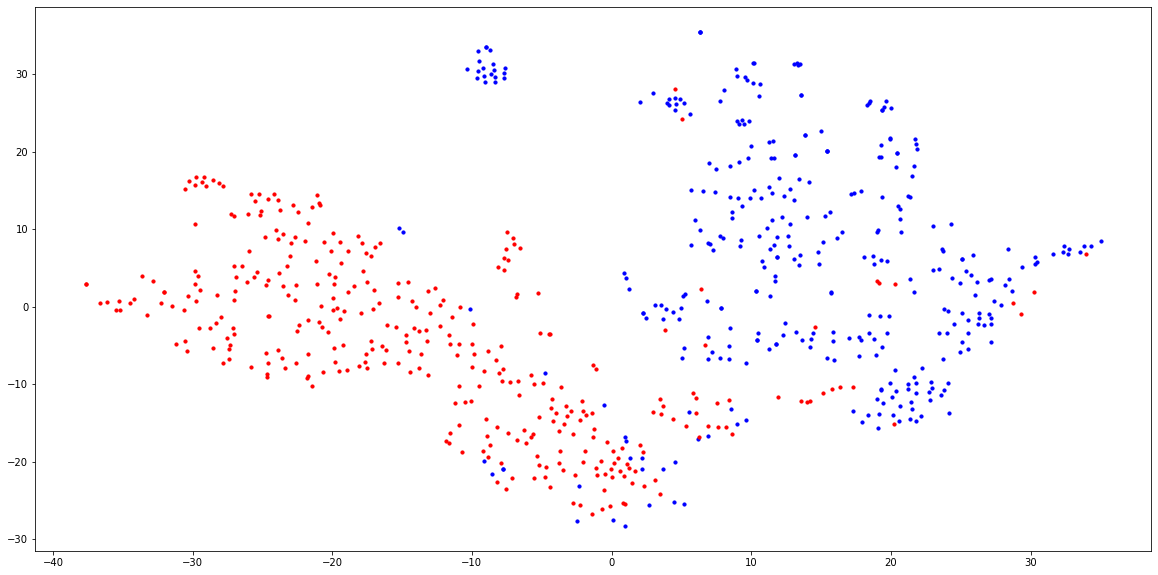

In [180]:
plt.figure(figsize=(20,10))
plt.scatter(X_embedded[labels,0], X_embedded[labels,1], color='b', s=10)
plt.scatter(X_embedded[np.logical_not(labels),0], X_embedded[np.logical_not(labels),1], color='r', s=10)
plt.show()

In [181]:
fmd.shape

(702, 3000)

In [182]:
from sklearn.decomposition import PCA

In [183]:
pca = PCA(n_components=2)
X_new = pca.fit_transform(fmd)

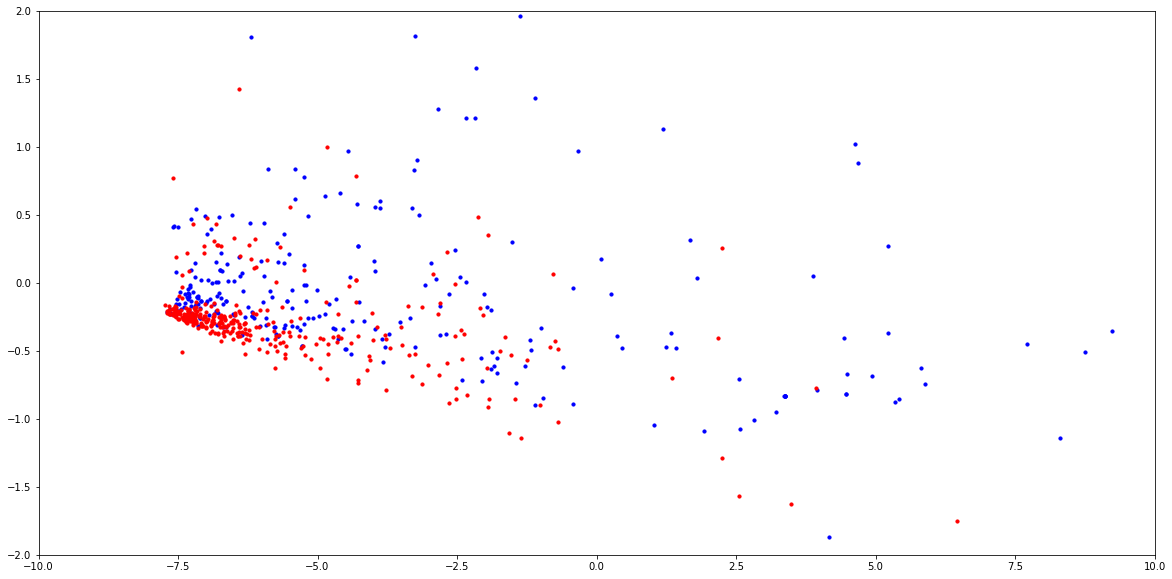

In [184]:
plt.figure(figsize=(20,10))
plt.scatter(X_new[labels,0], X_new[labels,1], color='b', s=10)
plt.scatter(X_new[np.logical_not(labels),0], X_new[np.logical_not(labels),1], color='r', s=10)
plt.ylim([-2,2])
plt.xlim([-10,10])
plt.show()